### Week 9 & 10
### DSC 640
### Abed Tabbalat
### Python

In [50]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [21]:
# Settings
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [22]:
# Data import (costco)
df_costco = pd.read_csv('costcos-geocoded.csv')
df_costco

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217
...,...,...,...,...,...,...
412,19610 SE 1st St,Vancouver,Washington,98607,45.621299,-122.459135
413,10990 Harbor Hill Dr,Gig Harbor,Washington,98335,47.357748,-122.603888
414,27520 Covington Way SE,Covington,Washington,98042,47.354838,-122.121185
415,2150 Deming Way,Middleton,Wisconsin,53562-5507,43.100195,-89.522751


In [23]:
# Data import (ppg2008)
df_ppg = pd.read_csv('ppg2008.csv')
df_ppg

,Name,G,MIN,PTS,FGM,...,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,...,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,...,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,...,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,...,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,...,2.7,1.0,1.4,2.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...
45,Shaquille O'neal,75,30.1,17.8,6.8,...,1.7,0.7,1.4,2.2,3.4
46,Rashard Lewis,79,36.2,17.7,6.1,...,2.6,1.0,0.6,2.0,2.5
47,Chauncey Billups,79,35.3,17.7,5.2,...,6.4,1.2,0.2,2.2,2.0
48,Allen Iverson,57,36.7,17.5,6.1,...,5.0,1.5,0.1,2.6,1.5


In [24]:
# Importing shape files
shape = gpd.read_file('shape/States_shapefile.shp', encoding='utf-8')
shape

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,NaN,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,NaN,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
...,...,...,...,...,...,...,...
46,47,NaN,VA,VIRGINIA,P,965,"MULTIPOLYGON (((-79.14406 36.54620, -79.21680 ..."
47,48,WA-FSIS,WA,WASHINGTON,F,966,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
48,49,NaN,WV,WEST VIRGINIA,N,967,"POLYGON ((-79.23166 38.48050, -79.27236 38.437..."
49,50,WI-ESR,WI,WISCONSIN,F,968,"MULTIPOLYGON (((-87.74855 44.96162, -87.83999 ..."


#### Heat Map

In [31]:
# Manual standardizing the data for the top 10 rows of the data
df_ppg_10 = df_ppg.iloc[:10, :11]
df_ppg_10 = df_ppg_10.set_index('Name  ')
df_ppg_10 = (df_ppg_10 - df_ppg_10.mean()) / df_ppg_10.std()
df_ppg_10

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM
Name,,,,,,,,,,
Dwyane Wade,0.667598,0.907723,1.897566,1.542701,1.535824,0.737356,0.865046,1.319968,-1.182214,-0.258678
LeBron James,0.832436,0.269480,1.159851,0.605148,0.442526,0.662876,0.722063,1.081060,-0.908553,0.388018
Kobe Bryant,0.914856,-0.794257,0.504105,0.690380,0.963144,-0.156409,-0.278817,-0.412117,0.477994,0.129339
Dirk Nowitzki,0.832436,0.269480,0.135248,0.519916,0.494587,0.290474,-0.207325,-0.531571,1.098291,-0.646696
Danny Granger,-0.321436,-0.794257,0.094264,-0.417637,0.026031,-0.901213,-0.207325,-0.412117,0.879363,1.810749
Kevin Durant,0.255500,1.191386,-0.110657,-0.076709,-0.130155,0.178753,-0.135834,-0.292663,0.605702,0.000000
Kevin Martin,-1.640147,0.624059,-0.397546,-1.951815,-1.639948,-1.906699,1.937417,1.618604,0.678678,1.293392
Al Jefferson,-1.722566,-0.510594,-1.012308,0.605148,0.234278,0.960798,-1.851628,-1.546931,-1.674803,-1.681409
Chris Paul,0.585178,0.836807,-1.135261,-0.758566,-1.535824,1.184239,-0.350308,-0.531571,0.696923,-0.646696


Text(0.5, 1.0, 'Python - Heat Map\n NBA Performance')

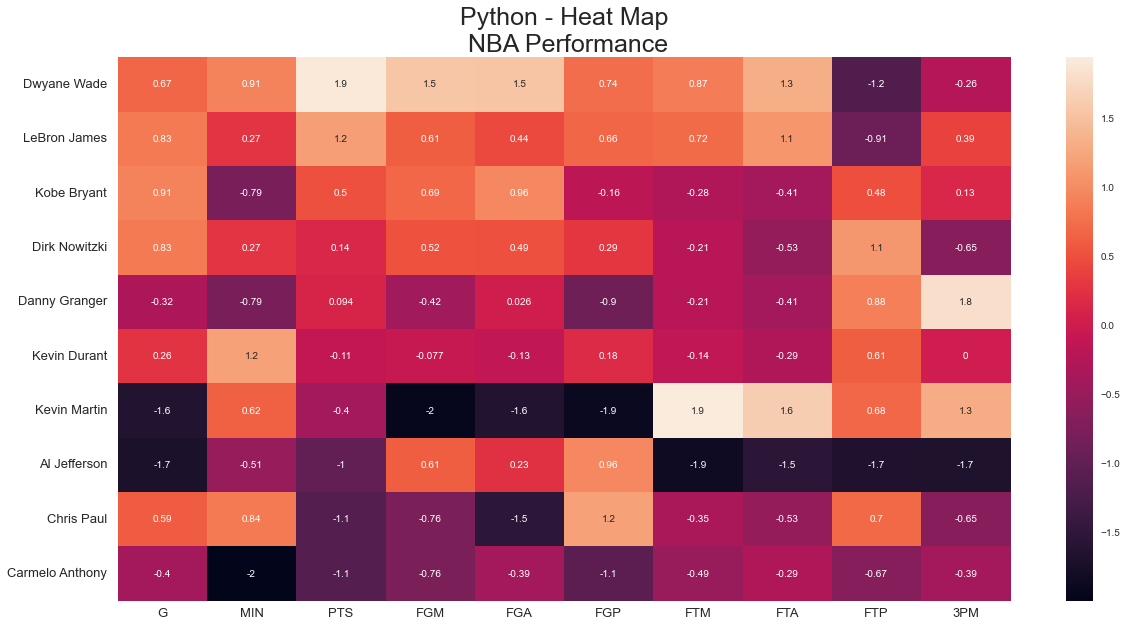

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot
sns.heatmap(df_ppg_10, annot=df_ppg_10)

# Format
plt.xlabel(None, fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel(None, fontsize=15)
plt.yticks(fontsize=13)
plt.title('Python - Heat Map\n NBA Performance', fontsize=25)

#### Spatial Chart

In [27]:
# Define the coordinate reference system (CRS)
crs = {'init': 'EPSG:4326'}

# Create a list of Point objects from the longitude and latitude columns
geometry = [Point(xy) for xy in zip(df_costco['Longitude'], df_costco['Latitude'])]

# Create a GeoDataFrame from the DataFrame and the list of Point objects
gdf = gpd.GeoDataFrame(df_costco, 
                           crs=crs, 
                           geometry=geometry)
gdf

c:\Users\abedt\Anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Address,City,State,Zip Code,Latitude,Longitude,geometry
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (-86.60096 34.74309)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (-86.81242 33.37765)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (-86.15088 32.36389)
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,POINT (-134.48300 58.35920)
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,POINT (-149.88422 61.14327)
...,...,...,...,...,...,...,...
412,19610 SE 1st St,Vancouver,Washington,98607,45.621299,-122.459135,POINT (-122.45913 45.62130)
413,10990 Harbor Hill Dr,Gig Harbor,Washington,98335,47.357748,-122.603888,POINT (-122.60389 47.35775)
414,27520 Covington Way SE,Covington,Washington,98042,47.354838,-122.121185,POINT (-122.12118 47.35484)
415,2150 Deming Way,Middleton,Wisconsin,53562-5507,43.100195,-89.522751,POINT (-89.52275 43.10019)


Text(0.5, 1.0, 'Python - Spatial Chart\n Costco Locations')

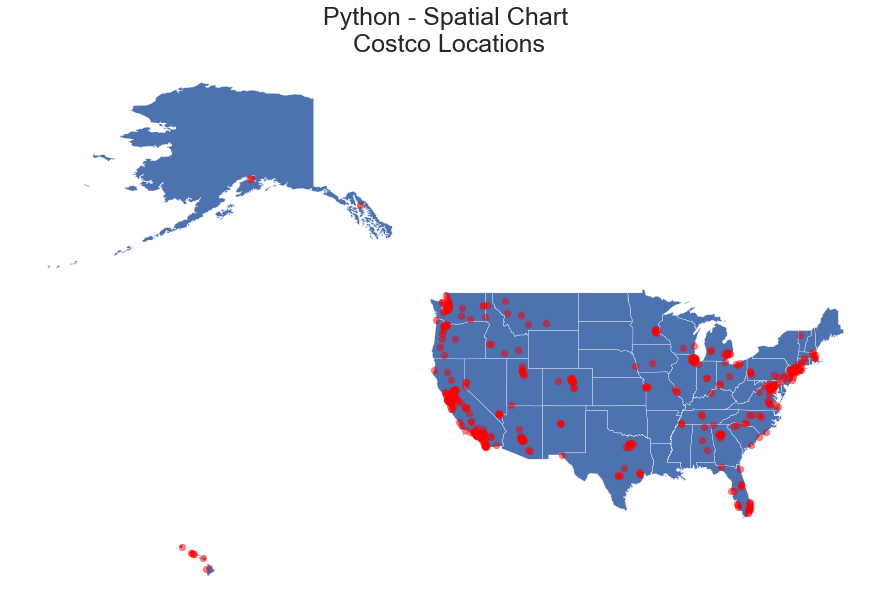

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot US
shape.to_crs(epsg=4326).plot(ax=ax)

# Plot Costco
gdf.plot(ax=ax, color='red', alpha=0.5)

# Format
ax.set_axis_off()
plt.xlabel(None, fontsize=15)
plt.ylabel(None, fontsize=15)
plt.title('Python - Spatial Chart\n Costco Locations', fontsize=25)

#### Contour Chart

In [41]:
# Meshgrid dataframe filters    
df_ppg_mesh = df_ppg.iloc[:10, :11]
df_ppg_mesh = df_ppg_mesh.set_index('Name  ')
df_ppg_mesh

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM
Name,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7
Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,1.3
Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,2.3
Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,0.0
Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,0.8


In [47]:
# Meshgrid
[X, Y] = np.meshgrid(df_ppg_mesh['MIN'], df_ppg_mesh['PTS'])
Z = np.sqrt(X ** 2 + Y ** 2)

C:\Users\abedt\AppData\Local\Temp\ipykernel_6808\352741134.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(test)


Text(0.5, 1.0, 'Python - Contour Chart\n NBA Performance')

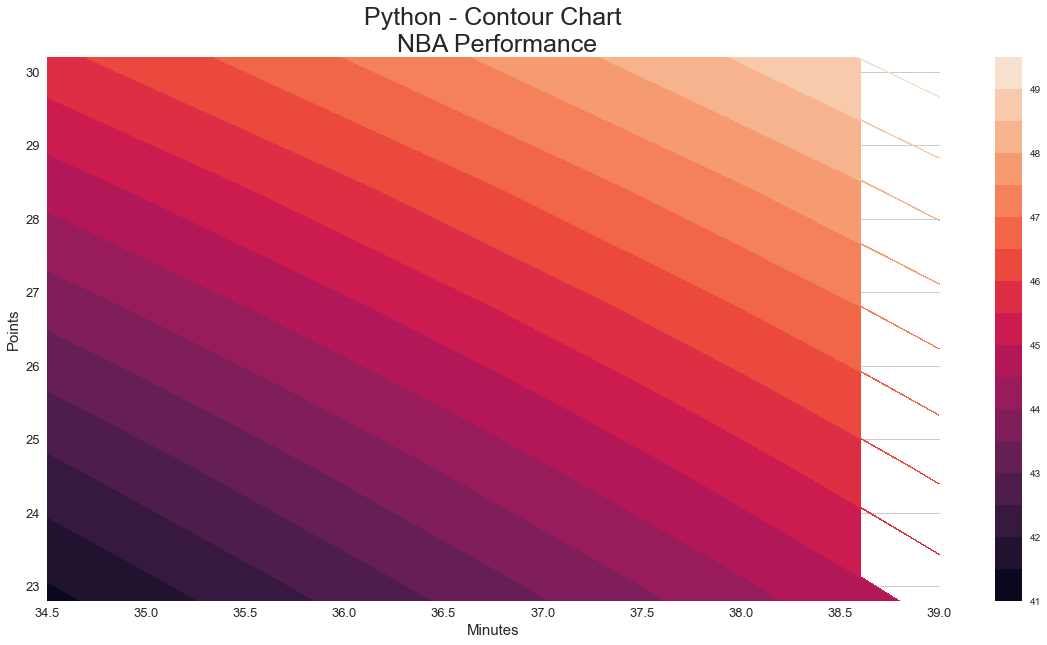

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot
test = ax.contourf(X, Y, Z, 16)
cbar = fig.colorbar(test)

# Formatting
plt.xlabel('Minutes', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Points', fontsize=15)
plt.yticks(fontsize=13)
plt.title('Python - Contour Chart\n NBA Performance', fontsize=25)
